In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
flight_data_df1 = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
flight_data_df1

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [3]:
flight_data_df.shape

(5268, 14)

In [4]:
flight_data_df.columns

Index(['index', 'Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route',
       'Type', 'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground',
       'Summary'],
      dtype='object')

In [5]:
flight_data_df.isnull().sum()

index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [6]:
#Flitering by Type
flight_data_df['Type'].unique()

array(['Wright Flyer III', 'Dirigible', 'Curtiss seaplane', ...,
       'Pilatus PC-6', 'Mi-35', 'Airbus A330-203'], dtype=object)

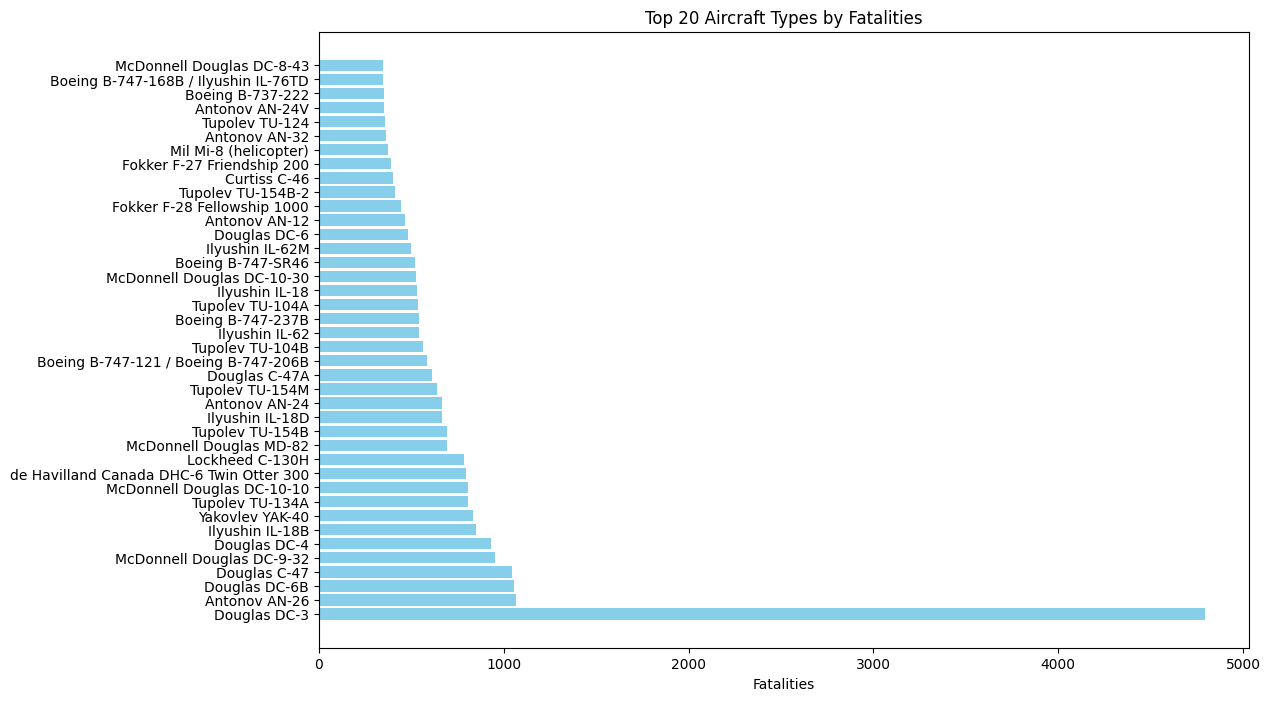

In [7]:
# Group by "Type" and sum up "fatalities"
fatalities_by_type = flight_data_df.groupby('Type')['Fatalities'].sum()
fatalities_by_type = fatalities_by_type.sort_values(ascending=False)

# Extract data for plotting
op_fatalities_x = fatalities_by_type.index
op_fatalities_y = fatalities_by_type.values

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(op_fatalities_x[:40], op_fatalities_y[:40], color='skyblue')
plt.xlabel('Fatalities')
plt.title('Top 20 Aircraft Types by Fatalities')
plt.show()

In [8]:
flight_data_df['Operator'].unique()

array(['Military - U.S. Army', 'Military - U.S. Navy', 'Private', ...,
       'Aerotuy airline', 'Bako Air', 'Strait Air'], dtype=object)

In [9]:
# Create a new column 'Civilian/Military' based on the presence of 'military' in the 'Type' column
flight_data_df['Civilian/Military'] = flight_data_df['Operator'].apply(lambda x: 'Military' if isinstance(x, str) and 'military' in x.lower() else 'Civilian')

# Display the unique values in the new column
flight_data_df

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Civilian/Military
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",Military
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,Military
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Civilian
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,Military
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,Military
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",Military
5264,5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,Civilian
5265,5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,Civilian
5266,5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,Civilian


In [10]:
flight_data_df['Civilian/Military'].unique()

array(['Military', 'Civilian'], dtype=object)

In [11]:
civilian_df = flight_data_df.loc[(flight_data_df['Civilian/Military'] == "Civilian")]
civilian_df

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Civilian/Military
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Civilian
21,21,12/16/1918,NaN,"Elizabeth, New Jersey",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,97,NaN,1.0,1.0,0.0,NaN,Civilian
22,22,05/25/1919,NaN,"Cleveland, Ohio",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,61,NaN,1.0,1.0,0.0,Caught fire in midair. The pilot leaped from t...,Civilian
23,23,07/19/1919,NaN,"Dix Run, Pennsylvania",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,82,NaN,1.0,1.0,0.0,NaN,Civilian
24,24,10/02/1919,NaN,"Newcastle, England",Aircraft Transport and Travel,NaN,NaN,De Havilland DH-4,NaN,NaN,1.0,1.0,0.0,NaN,Civilian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,5260,04/17/2009,15:32,"Canaima National Park, Venezuela",Aerotuy airline,NaN,Canaima - Porlamar,Cessna 208B Grand Caravan,YV-1181,208B-0695,11.0,1.0,0.0,"The plane, carrying 9 tourists, crashed 5 mile...",Civilian
5261,5261,04/29/2009,06:00,"Massamba, DemocratiRepubliof Congo",Bako Air,NaN,"Bangui, CAR- Brazzaville, Congo - Harare, Zimb...",Boeing B-737-200,TL-ADM,22264/753,7.0,7.0,0.0,Crashed while en route on a ferrying flight. T...,Civilian
5264,5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,Civilian
5265,5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,Civilian


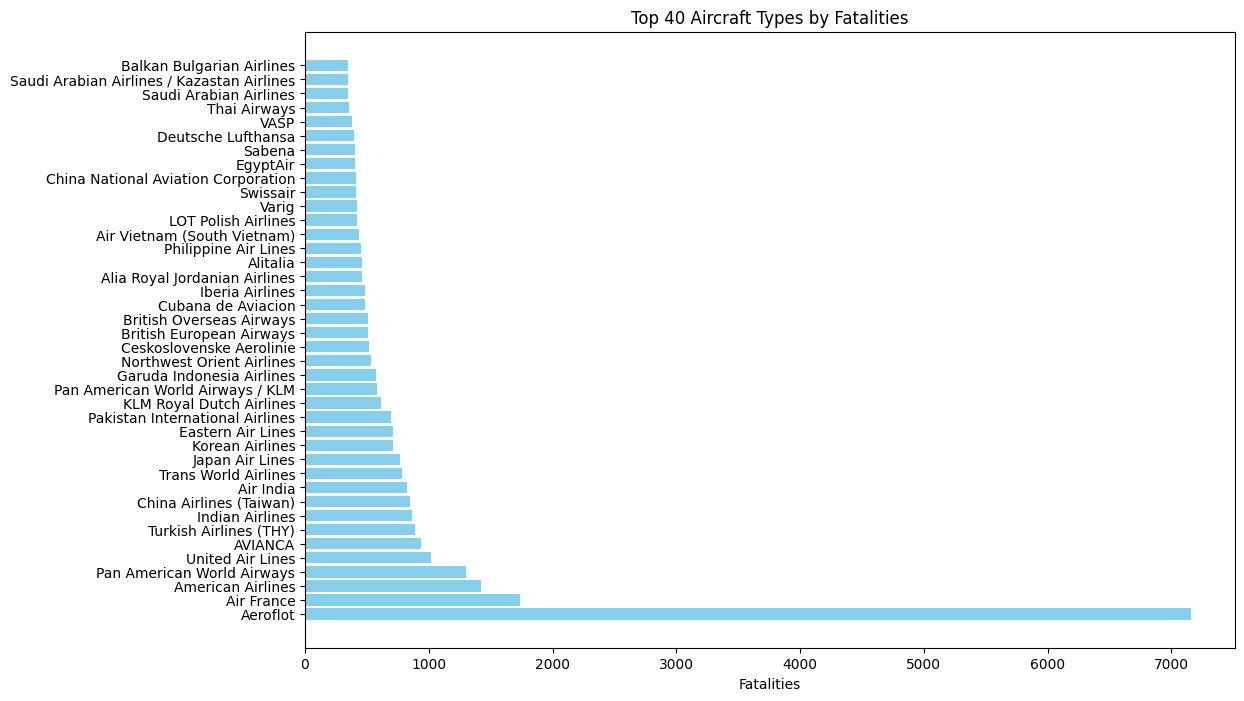

In [12]:
# Group by "Type" and sum up "fatalities"
fatalities_by_type = civilian_df.groupby('Operator')['Fatalities'].sum()
fatalities_by_type = fatalities_by_type.sort_values(ascending=False)

# Extract data for plotting
op_fatalities_x = fatalities_by_type.index
op_fatalities_y = fatalities_by_type.values

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(op_fatalities_x[:40], op_fatalities_y[:40], color='skyblue')
plt.xlabel('Fatalities')
plt.title('Top 40 Aircraft Types by Fatalities')
plt.show()

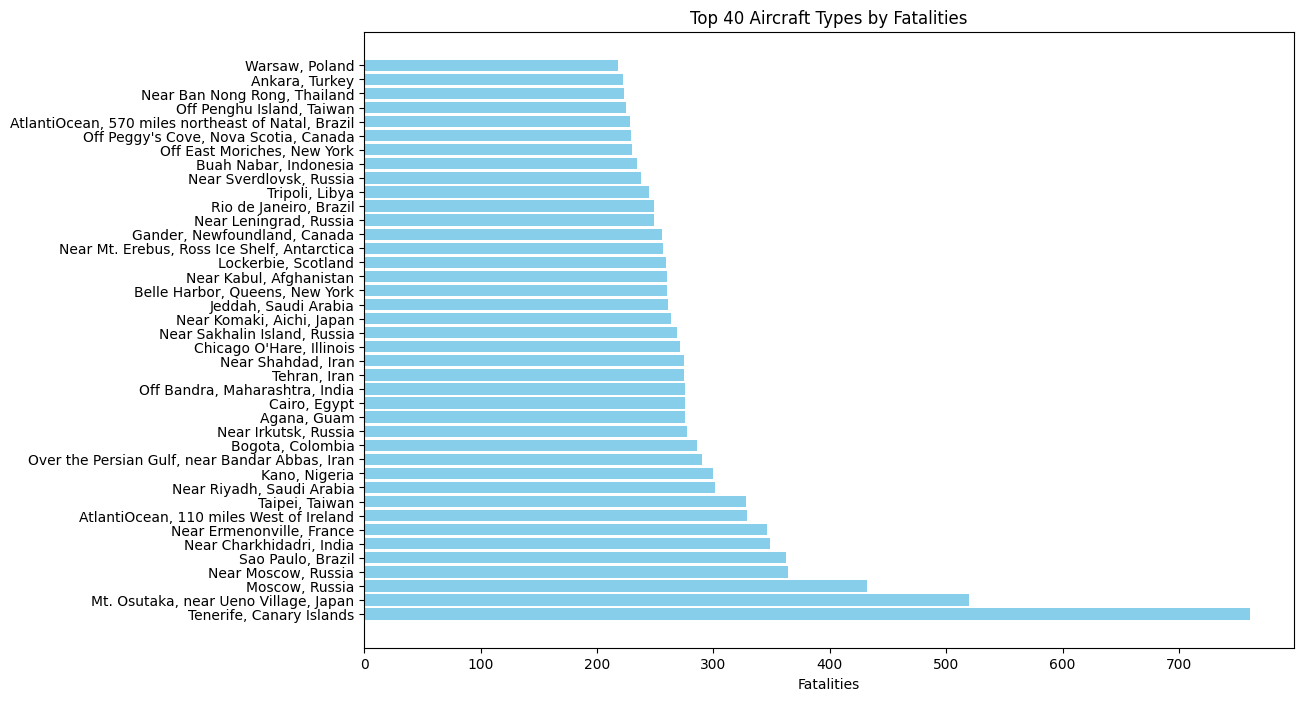

In [13]:
# Group by "Type" and sum up "fatalities"
fatalities_by_type = flight_data_df.groupby('Location').sum()['Fatalities']
fatalities_by_type = fatalities_by_type.sort_values(ascending=False)

# Extract data for plotting
op_fatalities_x = fatalities_by_type.index
op_fatalities_y = fatalities_by_type.values

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(op_fatalities_x[:40], op_fatalities_y[:40], color='skyblue')
plt.xlabel('Fatalities')
plt.title('Top 40 Aircraft Types by Fatalities')
plt.show()

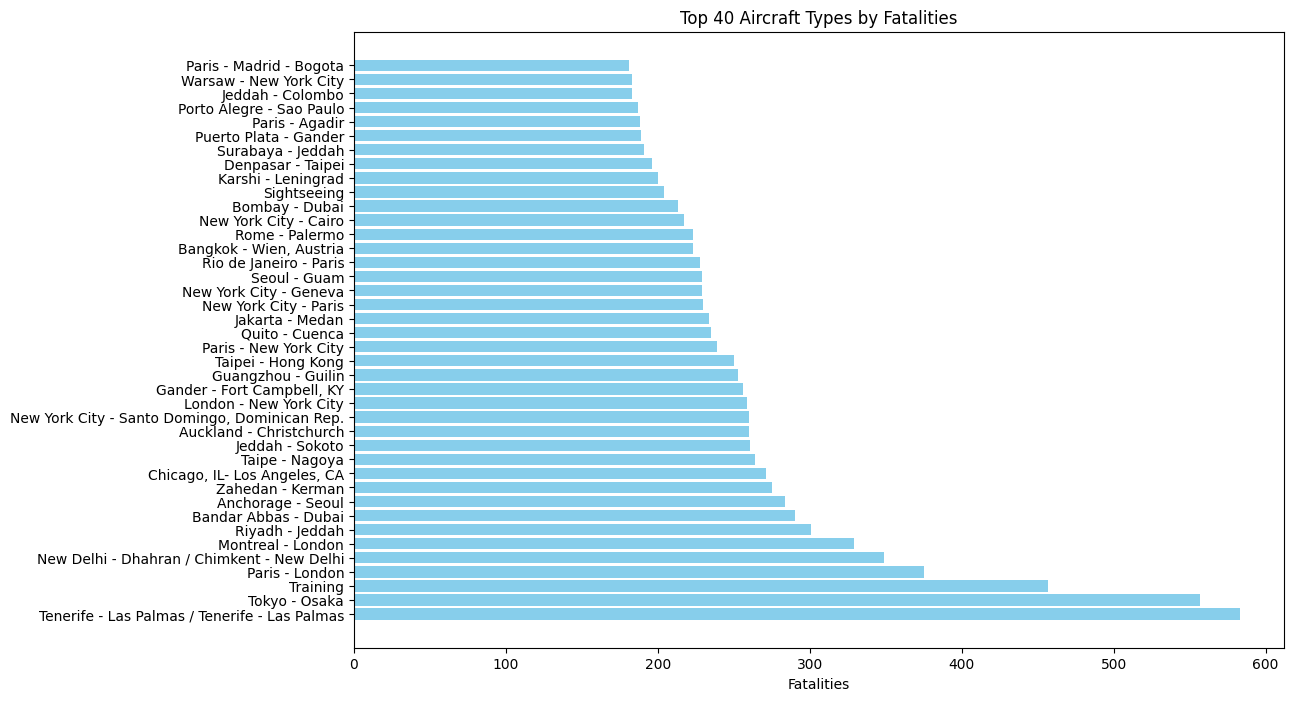

In [14]:
# Group by "Type" and sum up "fatalities"
fatalities_by_type = flight_data_df.groupby('Route').sum()['Fatalities']
fatalities_by_type = fatalities_by_type.sort_values(ascending=False)

# Extract data for plotting
op_fatalities_x = fatalities_by_type.index
op_fatalities_y = fatalities_by_type.values

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(op_fatalities_x[:40], op_fatalities_y[:40], color='skyblue')
plt.xlabel('Fatalities')
plt.title('Top 40 Aircraft Types by Fatalities')
plt.show()

In [15]:
# Convert the 'Time' column to datetime format
flight_data_df['Date'] = pd.to_datetime(flight_data_df['Date'])
# Extract the year from the 'Time' column and create a new 'Year' column
flight_data_df['Year'] = flight_data_df['Date'].dt.year

flight_data_df

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Civilian/Military,Year
0,0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",Military,1908
1,1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,Military,1912
2,2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Civilian,1913
3,3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,Military,1913
4,4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,Military,1913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,5263,2009-05-20,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",Military,2009
5264,5264,2009-05-26,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,Civilian,2009
5265,5265,2009-06-01,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,Civilian,2009
5266,5266,2009-06-07,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,Civilian,2009


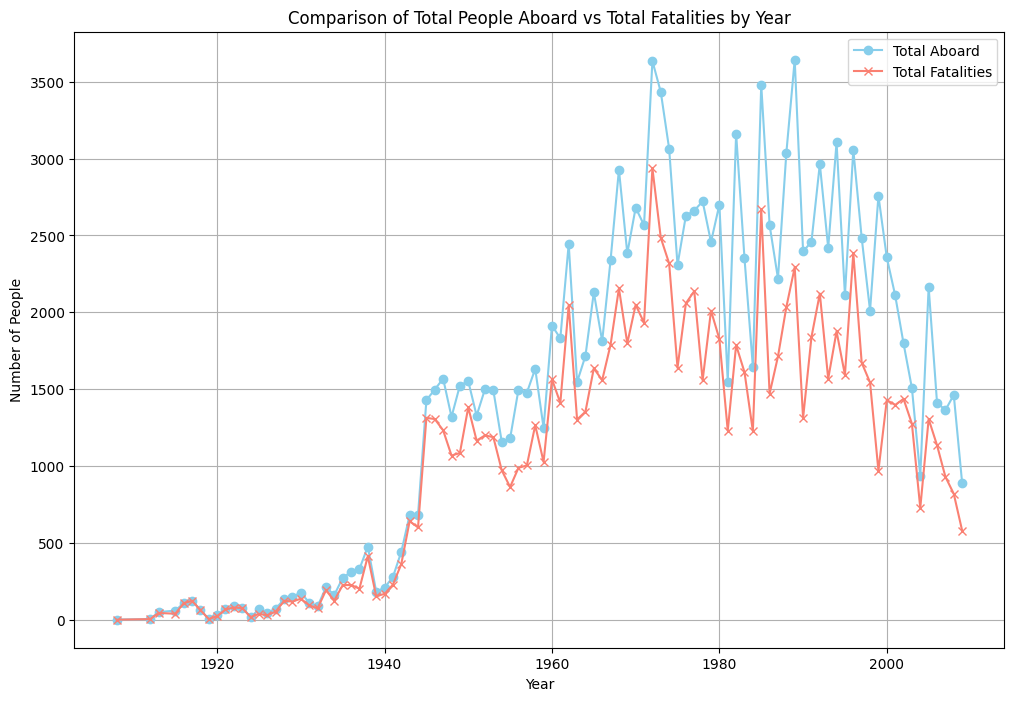

In [16]:
# Group by 'Year' and calculate total people aboard and total fatalities
grouped_data = flight_data_df.groupby('Year').agg({'Aboard': 'sum', 'Fatalities': 'sum'}).reset_index()

# Create a line chart to compare total people aboard and total fatalities based on the year
plt.figure(figsize=(12, 8))
plt.plot(grouped_data['Year'], grouped_data['Aboard'], marker='o', label='Total Aboard', color='skyblue')
plt.plot(grouped_data['Year'], grouped_data['Fatalities'], marker='x', label='Total Fatalities', color='salmon')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.title('Comparison of Total People Aboard vs Total Fatalities by Year')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Convert the 'Date' column to datetime format
flight_data_df['Date'] = pd.to_datetime(flight_data_df['Date'])
flight_data_df['Date'].dtype
# flight_data_df.head(3)

dtype('<M8[ns]')

In [34]:
# generate a map with the different routes
Geo_Locations = pd.read_csv('https://raw.githubusercontent.com/warazkhan/Data-Analysis/main/countries-latitude-longitude.csv')
Geo_Locations

# use fuzzy string matching techniques

# !pip install fuzzywuzzy
!pip install python-Levenshtein
!pip install rapidfuzz


Defaulting to user installation because normal site-packages is not writeable


In [36]:
from rapidfuzz import process, fuzz

# Assuming flight_data_df is your DataFrame containing flight data
# and Geo_Locations is your DataFrame containing GeoLocation data

# Create a list of unique country names from the GeoLocation DataFrame
country_names = Geo_Locations['name'].unique()

# Create a dictionary to store the processed country names for faster lookup
processed_country_names = {name: process.extractOne(name, country_names, scorer=fuzz.token_sort_ratio)[0] for name in country_names}

# Function to find the most similar country name
def find_similar_country_name(location):
    # Check if location is a valid string
    if isinstance(location, str):
        # Use the preprocessed country names for faster lookup
        return processed_country_names.get(location, None)
    else:
        return None

# Apply the function to extract similar country names from 'Location' or 'Operator' columns
flight_data_df['country'] = flight_data_df['Location'].apply(find_similar_country_name) \
                            .combine_first(flight_data_df['Operator'].apply(find_similar_country_name))

# Display the DataFrame to verify the changes
flight_data_df.head()



,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Civilian/Military,Year,country
0,0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",Military,1908,None
1,1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,Military,1912,None
2,2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Civilian,1913,None
3,3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,Military,1913,None
4,4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,Military,1913,None


In [ ]:
from fuzzywuzzy import process

# Since flight_data_df is the DataFrame containing flight data
# and Geo_Locations is the DataFrame containing GeoLocation data

# Create a list of unique country names from the GeoLocation DataFrame
country_names = Geo_Locations['name'].unique()

# Function to find the most similar country name
def find_similar_country_name(location):
    # Check if location is a valid string
    if isinstance(location, str):
        # Use fuzzy string matching to find the most similar country name
        match = process.extractOne(location, country_names)
        return match[0] if match else None
    else:
        return None

In [31]:
# Apply the function to extract similar country names from 'Location' or 'Operator' columns
flight_data_df['country'] = flight_data_df.apply(lambda row: find_similar_country_name(row['Location']) 
                                                 or find_similar_country_name(row['Operator']), axis=1)

# Display the DataFrame to verify the changes
flight_data_df

KeyboardInterrupt: 

In [32]:
from fuzzywuzzy import process

# Assuming flight_data_df is your DataFrame containing flight data
# and Geo_Locations is your DataFrame containing GeoLocation data

# Create a list of unique country names from the GeoLocation DataFrame
country_names = Geo_Locations['name'].unique()

# Use vectorized string matching to find the most similar country name
flight_data_df['country'] = flight_data_df['Location'].apply(lambda x: process.extractOne(x, country_names)[0] if isinstance(x, str) else None) \
                            .combine_first(flight_data_df['Operator'].apply(lambda x: process.extractOne(x, country_names)[0] if isinstance(x, str) else None))

# Display the DataFrame to verify the changes
flight_data_df


KeyboardInterrupt: 

In [37]:
!pip install geopy


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 330.3 kB/s eta 0:00:01
   ---------------------- ---------------- 71.7/125.4 kB 563.7 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 738.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00


In [ ]:
from geopy.geocoders import Nominatim

# Initialize Nominatim geocoder
geolocator = Nominatim(user_agent="geoapiExercises")

# Example DataFrame with 'Location' and 'Operator' columns
# Assuming flight_data_df is your DataFrame containing flight data
# and you want to extract country names from the 'Location' and 'Operator' columns
# Replace 'Location' and 'Operator' with the actual column names in your DataFrame
locations = flight_data_df['Location'].dropna()
operators = flight_data_df['Operator'].dropna()

# Function to extract country names from textual descriptions
def extract_country(text):
    try:
        location = geolocator.geocode(text)
        if location:
            return location.address.split(",")[-1].strip()
        else:
            return None
    except Exception as e:
        print(f"Error extracting country from {text}: {e}")
        return None

# Apply the function to 'Location' and 'Operator' columns
flight_data_df['Location_Country'] = locations.apply(extract_country)
flight_data_df['Operator_Country'] = operators.apply(extract_country)

# Display the DataFrame to verify the changes
print(flight_data_df[['Location', 'Location_Country', 'Operator', 'Operator_Country']])


In [39]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/103.4 kB ? eta -:--:--
     -------------------------------------  102.4/103.4 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 103.4/103.4 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.1 MB 1.9 MB/s eta 0:00:07
   ---------------------------------------- 0.1/12.1 MB 1.9 MB/s eta 0:00:07
    --------------------------------------- 0.3/12.1 MB 2.0 MB/s eta 0:00:07
   - -------------------------------------- 0.3/12.1 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.4/12.1 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.5/12.1 MB 1.8 MB/s eta 0:00:07
   - -------------------------------------- 0.5/12.1 MB 1.8 MB/s eta 0:00:07
   - -------------------------------------- 0.5/12.1 MB 1.8 MB/s eta 0:00:07
   

In [40]:
import spacy
from spacy.lang.xx import MultiLanguage

# Load the pre-trained language model
nlp = MultiLanguage()

# Function to extract country names from textual descriptions
def extract_country(text):
    doc = nlp(text)
    countries = [ent.text for ent in doc.ents if ent.label_ == 'GPE']  # GPE: Geopolitical Entity
    return countries[0] if countries else None

# Example DataFrame with 'Location' and 'Operator' columns
# Assuming flight_data_df is your DataFrame containing flight data
# and you want to extract country names from the 'Location' and 'Operator' columns
# Replace 'Location' and 'Operator' with the actual column names in your DataFrame
locations = flight_data_df['Location'].dropna()
operators = flight_data_df['Operator'].dropna()

# Apply the function to 'Location' and 'Operator' columns
flight_data_df['Location_Country'] = locations.apply(extract_country)
flight_data_df['Operator_Country'] = operators.apply(extract_country)

# Display the DataFrame to verify the changes
print(flight_data_df[['Location', 'Location_Country', 'Operator', 'Operator_Country']])


                                               Location Location_Country  \
0                                   Fort Myer, Virginia             None   
1                               AtlantiCity, New Jersey             None   
2                    Victoria, British Columbia, Canada             None   
3                                    Over the North Sea             None   
4                            Near Johannisthal, Germany             None   
...                                                 ...              ...   
5263                             Near Madiun, Indonesia             None   
5264                  Near Isiro, DemocratiRepubliCongo             None   
5265  AtlantiOcean, 570 miles northeast of Natal, Br...             None   
5266       Near Port Hope Simpson, Newfoundland, Canada             None   
5267                  State of Arunachal Pradesh, India             None   

                             Operator Operator_Country  
0                Military - U.

In [45]:
name_list = len([x for x in flight_data_df['Location'].unique()])
name_list

4304

In [41]:
flight_data_df

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Civilian/Military,Year,country,Location_Country,Operator_Country
0,0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",Military,1908,None,None,None
1,1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,Military,1912,None,None,None
2,2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Civilian,1913,None,None,None
3,3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,Military,1913,None,None,None
4,4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,Military,1913,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,5263,2009-05-20,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",Military,2009,None,None,None
5264,5264,2009-05-26,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,Civilian,2009,None,None,None
5265,5265,2009-06-01,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,Civilian,2009,None,None,None
5266,5266,2009-06-07,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,Civilian,2009,None,None,None


In [77]:
import requests
import re

#Countries API
response = requests.get("https://restcountries.com/v3.1/all") 

#response.status_code
#print (response.text)
data = list(response.json())
#countryDict =json.dumps(data)
#countryDict = json.loads(data)
#type(data)

rawcountrydf= pd.DataFrame(data)
countrylist=rawcountrydf['name'].tolist()
continentlist=rawcountrydf['continents'].tolist()


continentList=[]

for name in continentlist:
      for item in name:
            continentList.append(item)

officialCountryNameList=[]
commonCountryNameList=[]

for name in countrylist:
        key=list(name.keys())
        value = list(name.values())
        if key[0]=='common':
            commonCountryNameList.append(value[0])
        if key[1]=='official':
            officialCountryNameList.append(value[1])


RemoveNANValuesDataFrame = flight_data_df1.copy()

# Remove NaN values of Operator from Air Crashes dataframe 
RemoveNANValues= RemoveNANValuesDataFrame['Location'].notna()
checkLocationDataFrame = RemoveNANValuesDataFrame[RemoveNANValues]

checkLocationDataFrame['Year'] = pd.DatetimeIndex(checkLocationDataFrame['Date']).year
RemoveNANValuesYear= checkLocationDataFrame['Year'].notna()
checkLocationDataFrame = checkLocationDataFrame[RemoveNANValuesYear]

RemoveNANValuesFatalities= checkLocationDataFrame['Fatalities'].notna()
checkLocationDataFrame = checkLocationDataFrame[RemoveNANValuesFatalities]

RemoveNANValuesTime= checkLocationDataFrame['Time'].notna()
checkLocationDataFrame = checkLocationDataFrame[RemoveNANValuesTime]

RemoveNANValuesTime= checkLocationDataFrame['Operator'].notna()
checkLocationDataFrame = checkLocationDataFrame[RemoveNANValuesTime]

crashesTime = checkLocationDataFrame['Time'].tolist()
crashesLocation = checkLocationDataFrame['Location'].tolist()
crashesYear = checkLocationDataFrame['Year'].tolist()
crashesFatalities = checkLocationDataFrame['Fatalities'].tolist()
crashesOperator = checkLocationDataFrame['Operator'].tolist()

years=[]
countries=[]
fatalities=[]
continents=[]
time=[]
operator=[]


for i in range(len(crashesLocation)):     
    checkcountry = str(crashesLocation[i])
    Years= int(crashesYear[i])
    Fatalities= float(crashesFatalities[i])
    Time= str(crashesTime[i])
    Operator= str(crashesOperator[i])
    
    for j in range (len(officialCountryNameList)):
        checkofficial = re.findall( officialCountryNameList[j], checkcountry )
        checkcommon = re.findall( commonCountryNameList[j], checkcountry )

        if (checkofficial != []):
            countries.append(commonCountryNameList[j])
            years.append(Years)
            continents.append(continentList[j])
            fatalities.append(Fatalities)
            time.append(Time)
            operator.append(Operator)
            
        elif (checkcommon != []):
            countries.append(commonCountryNameList[j])
            years.append(Years)
            fatalities.append(Fatalities)
            continents.append(continentList[j])
            time.append(Time)
            operator.append(Operator)
         
countrydf= pd.DataFrame()

countrydf['Years'] = years
countrydf['Countries'] = countries
countrydf['Fatalities'] = fatalities
countrydf['Continents'] = continents
countrydf['Time'] = time
countrydf['Operator'] = operator

countrydf['Years'] = countrydf['Years'].astype(str)
countryDataframeYears = countrydf.groupby('Countries', sort=False).agg( ','.join)

countrydf['Time'] = countrydf['Time'].astype(str)
countryDataframeYears = countrydf.groupby('Countries', sort=False).agg( ','.join)

countrydf['Operator'] = countrydf['Operator'].astype(str)
countryDataframeYears = countrydf.groupby('Countries', sort=False).agg( ','.join)

countryDataframefatalities = countrydf.groupby('Countries')[['Fatalities']].sum()
countryDataframe = countrydf.groupby('Countries')[['Countries']].count()

countryDataframe['Fatalities'] = countryDataframefatalities.astype(int)
countryDataframe['Years'] = countryDataframeYears.Years
countryDataframe['Time'] = countryDataframeYears.Time
countryDataframe['Operator'] = countryDataframeYears.Operator

def generateCountryCode(countryColumn):
    countryCodeList=[]
    for country in countryColumn:
        try:
            code = pycountry.countries.get(name=country).alpha_3
            countryCodeList.append(code)
        except:
            countryCodeList.append('None')
    return countryCodeList

countryDataframe['Country_CODE'] = generateCountryCode(countryDataframe.index)


worlddf = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
worlddf.columns = ['pop_est', 'continent', 'name', 'Country_CODE', 'gdp_md_est', 'geometry']
mergeWorlddfOncountryDataframe = pd.merge(worlddf,countryDataframe,on='Country_CODE')


C:\Users\maero\AppData\Local\Temp\ipykernel_23308\1299464045.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkLocationDataFrame['Year'] = pd.DatetimeIndex(checkLocationDataFrame['Date']).year


TypeError: sequence item 0: expected str instance, float found

In [49]:
import pandas as pd
import geopandas

# Assuming countrydf is your DataFrame containing country data
# Convert non-string columns to string
countrydf['Years'] = countrydf['Years'].astype(str)
countrydf['Time'] = countrydf['Time'].astype(str)
countrydf['Operator'] = countrydf['Operator'].astype(str)

# Group by 'Countries' and aggregate other columns
countryDataframeYears = countrydf.groupby('Countries', sort=False).agg({
    'Years': ','.join,
    'Time': ','.join,
    'Operator': ','.join
}).reset_index()

# Merge the aggregated DataFrame with other columns
countryDataframefatalities = countrydf.groupby('Countries')[['Fatalities']].sum()
countryDataframe = countrydf.groupby('Countries')[['Countries']].count()

countryDataframe['Fatalities'] = countryDataframefatalities.astype(int)
countryDataframe = countryDataframe.merge(countryDataframeYears, on='Countries')

# Generate country codes
def generateCountryCode(countryColumn):
    countryCodeList=[]
    for country in countryColumn:
        try:
            code = pycountry.countries.get(name=country).alpha_3
            countryCodeList.append(code)
        except:
            countryCodeList.append('None')
    return countryCodeList

countryDataframe['Country_CODE'] = generateCountryCode(countryDataframe['Countries'])

# Merge with world data
worlddf = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
worlddf.columns = ['pop_est', 'continent', 'name', 'Country_CODE', 'gdp_md_est', 'geometry']
mergeWorlddfOncountryDataframe = pd.merge(worlddf, countryDataframe, on='Country_CODE')

# Display the merged DataFrame
print(mergeWorlddfOncountryDataframe)


ValueError: 'Countries' is both an index level and a column label, which is ambiguous.

In [51]:
!pip install pycountry

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/6.2 MB 302.7 kB/s eta 0:00:21
    --------------------------------------- 0.1/6.2 MB 346.5 kB/s eta 0:00:18
   - -------------------------------------- 0.2/6.2 MB 556.2 kB/s eta 0:00:11
   - -------------------------------------- 0.2/6.2 MB 556.2 kB/s eta 0:00:11
   - -------------------------------------- 0.2/6.2 MB 556.2 kB/s eta 0:00:11
   -- ------------------------------------- 0.3/6.2 MB 678.1 kB/s eta 0:00:09
   -- ------------------------------------- 0.3/6.2 MB 678.1 kB/s eta 0:00:09
   -- -------------------------

In [92]:
# Run this

import pandas as pd
import re
import geopandas
import requests
import pycountry

# Countries API
response = requests.get("https://restcountries.com/v3.1/all") 
data = response.json()
rawcountrydf = pd.DataFrame(data)
countrylist = rawcountrydf['name'].tolist()
continentlist = rawcountrydf['continents'].tolist()

continentList = []
for name in continentlist:
    for item in name:
        continentList.append(item)

officialCountryNameList = []
commonCountryNameList = []

for name in countrylist:
    key = list(name.keys())
    value = list(name.values())
    if key[0] == 'common':
        commonCountryNameList.append(value[0])
    if key[1] == 'official':
        officialCountryNameList.append(value[1])

# Assuming flight_data_df contains data for flight crashes
RemoveNANValuesDataFrame = flight_data_df1.copy()

# Remove NaN values
# ###################################RemoveNANValuesDataFrame = RemoveNANValuesDataFrame.dropna(subset=['Location', 'Date', 'Fatalities', 'Time', 'Operator'])
RemoveNANValuesDataFrame['Year'] = pd.DatetimeIndex(RemoveNANValuesDataFrame['Date']).year

crashesTime = RemoveNANValuesDataFrame['Time'].tolist()
crashesLocation = RemoveNANValuesDataFrame['Location'].tolist()
crashesYear = RemoveNANValuesDataFrame['Year'].tolist()
crashesFatalities = RemoveNANValuesDataFrame['Fatalities'].tolist()
crashesOperator = RemoveNANValuesDataFrame['Operator'].tolist()

years = []
countries = []
fatalities = []
continents = []
time = []
operator = []

for i in range(len(crashesLocation)):     
    checkcountry = str(crashesLocation[i])
    Years = int(crashesYear[i])
    Fatalities = float(crashesFatalities[i])
    Time = str(crashesTime[i])
    Operator = str(crashesOperator[i])
    
    for j in range(len(officialCountryNameList)):
        checkofficial = re.findall(officialCountryNameList[j], checkcountry)
        checkcommon = re.findall(commonCountryNameList[j], checkcountry)

        if (checkofficial != []):
            countries.append(commonCountryNameList[j])
            years.append(Years)
            continents.append(continentList[j])
            fatalities.append(Fatalities)
            time.append(Time)
            operator.append(Operator)
            
        elif (checkcommon != []):
            countries.append(commonCountryNameList[j])
            years.append(Years)
            fatalities.append(Fatalities)
            continents.append(continentList[j])
            time.append(Time)
            operator.append(Operator)
         
countrydf = pd.DataFrame()

countrydf['Years'] = years
countrydf['Countries'] = countries
countrydf['Fatalities'] = fatalities
countrydf['Continents'] = continents
countrydf['Time'] = time
countrydf['Operator'] = operator

# Handle NaN values by filling with a placeholder
countrydf['Years'] = countrydf['Years'].fillna('').astype(str)
countrydf['Time'] = countrydf['Time'].fillna('').astype(str)
countrydf['Operator'] = countrydf['Operator'].fillna('').astype(str)

# Aggregate the columns after converting them to strings
countryDataframeYears = countrydf.groupby('Countries', sort=False).agg({
    'Years': ','.join,
    'Time': ','.join,
    'Operator': ','.join
})

# Continue with the rest of your code...
# Continue from where we left off...

countryDataframefatalities = countrydf.groupby('Countries')[['Fatalities']].sum()
countryDataframe = countrydf.groupby('Countries')[['Countries']].count()

countryDataframe['Fatalities'] = countryDataframefatalities.astype(int)
countryDataframe['Years'] = countryDataframeYears['Years']
countryDataframe['Time'] = countryDataframeYears['Time']
countryDataframe['Operator'] = countryDataframeYears['Operator']

def generateCountryCode(countryColumn):
    countryCodeList = []
    for country in countryColumn:
        try:
            code = pycountry.countries.get(name=country).alpha_3
            countryCodeList.append(code)
        except:
            countryCodeList.append('None')
    return countryCodeList

countryDataframe['Country_CODE'] = generateCountryCode(countryDataframe.index)

worlddf = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
worlddf.columns = ['pop_est', 'continent', 'name', 'Country_CODE', 'gdp_md_est', 'geometry']

# Merge world dataframe with country dataframe
mergeWorlddfOncountryDataframe = pd.merge(worlddf, countryDataframe, on='Country_CODE')


C:\Users\maero\AppData\Local\Temp\ipykernel_23308\3251250671.py:123: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worlddf = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [55]:
mergeWorlddfOncountryDataframe

,pop_est,continent,name,Country_CODE,gdp_md_est,geometry,Countries,Fatalities,Years,Time,Operator
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2,28,"1986,1999","13:48,05:35","Sunflower Airlines,Air Fiji"
1,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",92,1546,"1938,1941,1941,1947,1948,1949,1950,1951,1952,1...","00:51,02:00,22:10,23:13,16:50,10:45,13:53,18:5...","Trans Canada Air Lines,Trans Canada Air Lines,..."
2,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",2,10,"1987,2004","19:10,10:40","Aeroflot,Aray-Avia"
3,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",5,282,"1987,1985,1991,1999,2004","08:11,23:45,11:37,10:54,19:40","Aeroflot,Aeroflot,Uzbek Civil Aviation Adminis..."
4,8776109.0,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",6,53,"1994,1995,1996,1999,1999,2004","11:40,08:00,13:15,10:20,08:52,10:30","Southwest Air,Milne Bay Air,Milne Bay Air,Airl..."
...,...,...,...,...,...,...,...,...,...,...,...
124,100388073.0,Africa,Egypt,EGY,303092,"POLYGON ((36.86623 22.00000, 32.90000 22.00000...",20,790,"1935,1950,1953,1956,1961,1965,1966,1968,1968,1...","17:20,00:03,19:00,02:40,04:11,23:48,18:40,07:5...","Imperial Airways,Trans World Airlines,Military..."
125,6777452.0,Africa,Libya,LBY,52091,"POLYGON ((25.00000 22.00000, 25.00000 20.00304...",9,372,"1945,1955,1958,1968,1970,1988,1989,1992,2000","23:45,22:23,01:14,12:00,03:12,07:20,07:00,10:0...","Military -Royal Air Force,British Overseas Air..."
126,112078730.0,Africa,Ethiopia,ETH,95912,"POLYGON ((47.78942 8.00300, 44.96360 5.00162, ...",8,166,"1960,1972,1972,1977,1987,1988,1989,2007","09:40,09:39,10:20,17:30,13:30,13:05,12:10,13:00","Ethiopian Airlines,East African Airways,Ethiop..."
127,973560.0,Africa,Djibouti,DJI,3324,"POLYGON ((42.35156 12.54223, 42.77964 12.45542...",3,58,"1982,1986,2002","07:30,08:30,8:02","Military - French Air Force,Military - French ..."


In [80]:
import geopandas as gpd

# Assuming mergeWorlddfOncountryDataframe is your GeoDataFrame

# Extract centroid of each geometry
mergeWorlddfOncountryDataframe['centroid'] = mergeWorlddfOncountryDataframe.geometry.centroid

# Extract latitude and longitude from centroid
mergeWorlddfOncountryDataframe['latitude'] = mergeWorlddfOncountryDataframe.centroid.y
mergeWorlddfOncountryDataframe['longitude'] = mergeWorlddfOncountryDataframe.centroid.x

# Drop the centroid column if you don't need it anymore
mergeWorlddfOncountryDataframe.drop(columns=['centroid'], inplace=True)

# Display the DataFrame with latitude and longitude columns
print(mergeWorlddfOncountryDataframe[['name', 'latitude', 'longitude']])


                 name   latitude   longitude
0                Fiji -17.316309  163.853165
1              Canada  61.469076  -98.142381
2          Kazakhstan  48.191661   67.284611
3          Uzbekistan  41.748603   63.203640
4    Papua New Guinea  -6.451645  145.317575
..                ...        ...         ...
124             Egypt  26.506620   29.844462
125             Libya  26.997460   17.974353
126          Ethiopia   8.653999   39.551256
127          Djibouti  11.773044   42.498020
128            Uganda   1.295486   32.357550

[129 rows x 3 columns]


C:\Users\maero\AppData\Local\Temp\ipykernel_23308\87593294.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mergeWorlddfOncountryDataframe['centroid'] = mergeWorlddfOncountryDataframe.geometry.centroid
C:\Users\maero\AppData\Local\Temp\ipykernel_23308\87593294.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mergeWorlddfOncountryDataframe['latitude'] = mergeWorlddfOncountryDataframe.centroid.y
C:\Users\maero\AppData\Local\Temp\ipykernel_23308\87593294.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mergeWorlddfOncountryDataframe['longitude'] = mergeWorlddfOnco

In [58]:
mergeWorlddfOncountryDataframe.head()

,pop_est,continent,name,Country_CODE,gdp_md_est,geometry,Countries,Fatalities,Years,Time,Operator,latitude,longitude
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2,28,"1986,1999","13:48,05:35","Sunflower Airlines,Air Fiji",-17.316309,163.853165
1,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",92,1546,"1938,1941,1941,1947,1948,1949,1950,1951,1952,1...","00:51,02:00,22:10,23:13,16:50,10:45,13:53,18:5...","Trans Canada Air Lines,Trans Canada Air Lines,...",61.469076,-98.142381
2,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",2,10,"1987,2004","19:10,10:40","Aeroflot,Aray-Avia",48.191661,67.284611
3,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",5,282,"1987,1985,1991,1999,2004","08:11,23:45,11:37,10:54,19:40","Aeroflot,Aeroflot,Uzbek Civil Aviation Adminis...",41.748603,63.203640
4,8776109.0,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",6,53,"1994,1995,1996,1999,1999,2004","11:40,08:00,13:15,10:20,08:52,10:30","Southwest Air,Milne Bay Air,Milne Bay Air,Airl...",-6.451645,145.317575


In [62]:
%%capture --no-display

import hvplot.pandas
import geopandas as gpd

 # Plot the map with points sized by humidity
# map_plot = city_data_df.hvplot.scatter(
#     x='Lng',
#     y='Lat',
#     size='Humidity',  # Use 'Humidity' column to determine point size
#     color='blue',  # Set color of points
#     alpha=0.7,  # Set transparency of points
#     hover_cols=['City', 'Country', 'Humidity'],  # Include 'Humidity' in hover information
#     geo=True,  # Enable geographic projection
#     tiles='CartoLight',  # Specify the map tile source
#     width=800,  # Set width of the plot
#     height=500,  # Set height of the plot
#     title='City Locations with Humidity'  # Set title of the plot
# )

map_plot = mergeWorlddfOncountryDataframe.hvplot.points('longitude',
            'latitude',
            geo=True, 
            tiles = 'OSM', 
            frame_width = 800, 
            frame_height = 500, 
            color='name',
            alpha=0.7,
            hover=True,
            hover_cols='all',
            use_index=False,
            s ='Fatalities',
            scale= 1.2)

mergeWorlddfOncountryDataframe.plot

KeyboardInterrupt: 

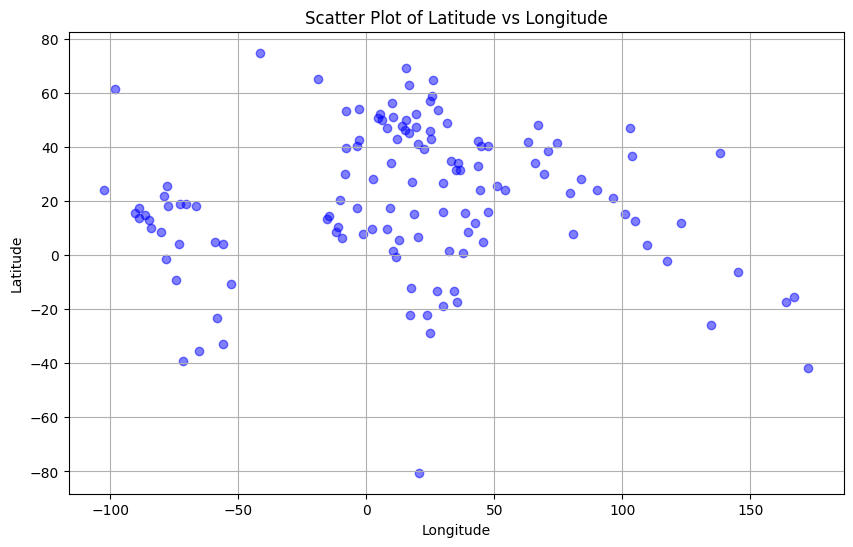

In [63]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mergeWorlddfOncountryDataframe.longitude, mergeWorlddfOncountryDataframe.latitude, color='blue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude vs Longitude')
plt.grid(True)
plt.show()


C:\Users\maero\AppData\Local\Temp\ipykernel_23308\2627756135.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))


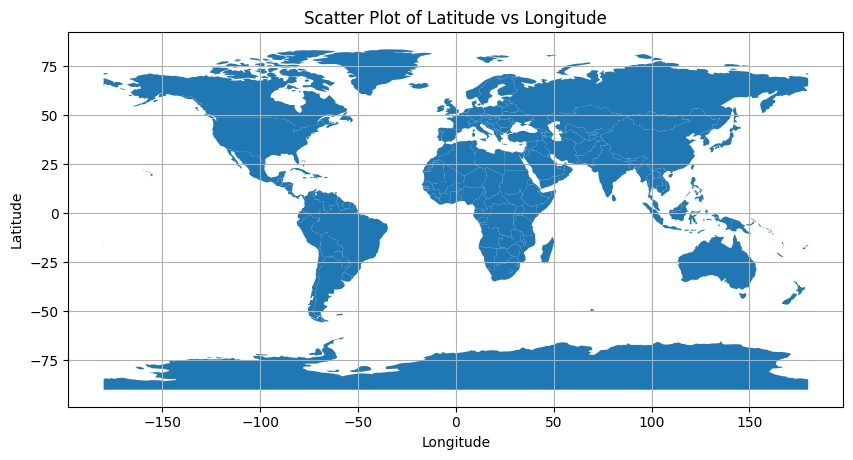

In [81]:
import geopandas as gdp

# Load the natural earth dataset
world = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))

# Scatter plot
world.plot(figsize=(10, 6))
# plt.scatter(mergeWorlddfOncountryDataframe.longitude, mergeWorlddfOncountryDataframe.latitude, color='blue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude vs Longitude')
plt.grid(True)
plt.show()


C:\Users\maero\AppData\Local\Temp\ipykernel_23308\1820154310.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))


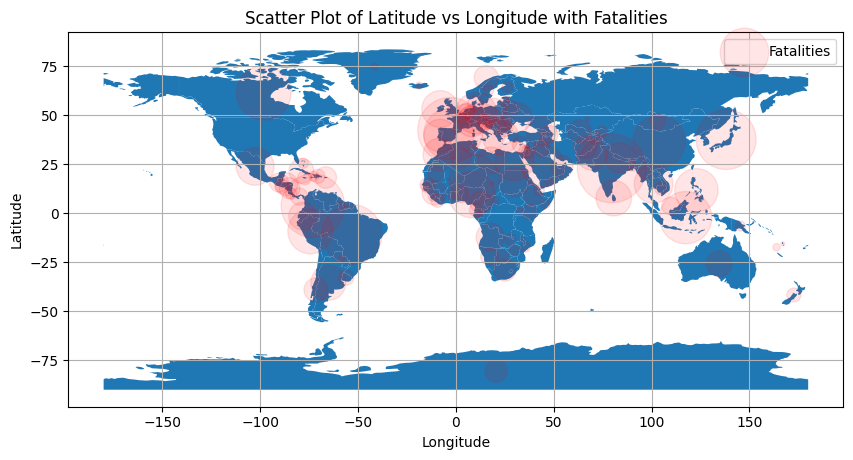

In [82]:
import geopandas as gdp
import matplotlib.pyplot as plt

# Load the natural earth dataset
world = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))

# Create a scatter plot of the world map
world.plot(figsize=(10, 6))

# Plot the number of fatalities as a scatter plot on top of the world map
plt.scatter(mergeWorlddfOncountryDataframe.longitude, mergeWorlddfOncountryDataframe.latitude, 
            s=mergeWorlddfOncountryDataframe.Fatalities,  # Size of the marker based on the number of fatalities
            alpha=0.1,  # Transparency
            color='red',  # Marker color
            label='Fatalities')  # Label for the legend

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude vs Longitude with Fatalities')
plt.grid(True)
plt.legend()  # Show legend
plt.show()


In [83]:
whereis = [x for x in mergeWorlddfOncountryDataframe['name'].unique()]
whereis

['Fiji',
 'Canada',
 'Kazakhstan',
 'Uzbekistan',
 'Papua New Guinea',
 'Indonesia',
 'Argentina',
 'Chile',
 'Somalia',
 'Kenya',
 'Sudan',
 'Chad',
 'Haiti',
 'Dominican Rep.',
 'Bahamas',
 'Norway',
 'Greenland',
 'South Africa',
 'Mexico',
 'Uruguay',
 'Brazil',
 'Peru',
 'Colombia',
 'Panama',
 'Costa Rica',
 'Nicaragua',
 'Honduras',
 'El Salvador',
 'Guatemala',
 'Belize',
 'Guyana',
 'Suriname',
 'France',
 'Ecuador',
 'Puerto Rico',
 'Jamaica',
 'Cuba',
 'Zimbabwe',
 'Botswana',
 'Namibia',
 'Senegal',
 'Mali',
 'Mauritania',
 'Benin',
 'Niger',
 'Nigeria',
 'Cameroon',
 'Ghana',
 'Guinea',
 'Liberia',
 'Sierra Leone',
 'Central African Rep.',
 'Gabon',
 'Eq. Guinea',
 'Zambia',
 'Malawi',
 'Mozambique',
 'Angola',
 'Israel',
 'Lebanon',
 'Gambia',
 'Tunisia',
 'Algeria',
 'Jordan',
 'United Arab Emirates',
 'Qatar',
 'Iraq',
 'Vanuatu',
 'Cambodia',
 'Thailand',
 'Myanmar',
 'Mongolia',
 'India',
 'Bangladesh',
 'Nepal',
 'Pakistan',
 'Afghanistan',
 'Tajikistan',
 'Kyrgyzsta

In [65]:
import hvplot.pandas
map_plot = mergeWorlddfOncountryDataframe.hvplot.points(
    'longitude',  # Use 'longitude' column for x-coordinate
    'latitude',  # Use 'latitude' column for y-coordinate
    geo=True,  # Enable geographic projection
    tiles='OSM',  # Specify the map tile source
    frame_width=800,  # Set width of the plot
    frame_height=500,  # Set height of the plot
    color='Countries',  # Set color based on 'Countries' column
    alpha=0.7,  # Set transparency of points
    hover=True,  # Enable hover information
    hover_cols=['Countries', 'Fatalities', 'Years', 'Time', 'Operator'],  # Include additional columns in hover information
    use_index=False,  # Do not use DataFrame index for hover information
    size='Fatalities',  # Use 'Fatalities' column to determine point size
    scale=1.2,  # Set scale factor for point size
    title='World Map with Country Data'  # Set title of the plot
)



KeyboardInterrupt: 

In [54]:
!pip install geopandas hvplot


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import geopandas as gpd
import hvplot.pandas

# Load the dataset
data = [
    {
        'pop_est': 889953.0,
        'continent': 'Oceania',
        'name': 'Fiji',
        'Country_CODE': 'FJI',
        'gdp_md_est': 5496,
        'geometry': 'MULTIPOLYGON (((180.00000 -16.06713, 180.00000...',
        'Countries': 2,
        'Fatalities': 28,
        'Years': '1986,1999',
        'Time': '13:48,05:35',
        'Operator': 'Sunflower Airlines,Air Fiji'
    },
    # Add more data here...
]

# Convert data to a GeoDataFrame
gdf = gpd.GeoDataFrame(data)

# Plot using hvplot
plot = gdf.hvplot(
    geo=True,
    line_width=1.5,
    hover_cols=['Countries', 'Fatalities', 'Years', 'Time', 'Operator'],
    tiles='EsriImagery',
    title='Flight Fatalities by Country',
    frame_height=400,
    frame_width=600
)

plot


In [56]:
import hvplot.pandas
import geopandas as gpd

# Plot using hvplot
plot = mergeWorlddfOncountryDataframe.hvplot(
    geo=True,
    line_width=1.5,
    hover_cols=['Countries', 'Fatalities', 'Years', 'Time', 'Operator'],
    tiles='EsriImagery',
    title='Flight Fatalities by Country',
    frame_height=400,
    frame_width=600
)

plot



KeyboardInterrupt



In [ ]:
#CSV file to get the data of logitude and Latitude of countries
location = pd.read_csv('https://raw.githubusercontent.com/warazkhan/Data-Analysis/main/countries-latitude-longitude.csv')
countriesdf = mergeWorlddfOncountryDataframe.merge(location,on='name').sort_values(by='Fatalities',ascending=False).reset_index()

worldMap = folium.Map(tiles="cartodbpositron", zoom_start=10, min_zoom=1.5, max_zoom=10) 

def add_markers_to_the_map(worldMap, gdf, color, icon):  

    for i in range(0,len(countriesdf)):
        name = (countriesdf.name[i]).split(' ')
        continent = (countriesdf.continent[i]).split(' ')
        years = countriesdf.Years[i]
        time = countriesdf.Time[i]
        operator= countriesdf.Operator[i]
        popup_text = "Country:{}({})  Continent:{}  No.ofCrashes:{}  No.ofFacilities:{}  YearsOfCrashes:{}...  TimeOfCrashes:{}... FlightOperator:{}...".format(''.join(name), countriesdf.Country_CODE[i], ''.join(continent), int(countriesdf.Countries[i]), int(countriesdf.Fatalities[i]), years[0:99], time[0:101], operator[0:100])
        popup = folium.Popup(popup_text, autopan='False', parse_html=True,  max_width='100%', lazy ='True')
        marker = folium.Marker(location=[float(countriesdf.latitude[i]),float(countriesdf.longitude[i])], popup=popup, icon = folium.Icon(icon_size=(25, 25), color=color, icon=icon, prefix='fa', draggable= True)).add_to(worldMap)

    return worldMap

folium.TileLayer('Stamen Terrain').add_to(worldMap)
folium.TileLayer('Stamen Toner').add_to(worldMap)
folium.TileLayer('Stamen Water Color').add_to(worldMap)
folium.TileLayer('cartodbpositron').add_to(worldMap)
folium.TileLayer('cartodbdark_matter').add_to(worldMap)
folium.LayerControl().add_to(worldMap)



add_markers_to_the_map(worldMap, countriesdf, color = 'darkred', icon="fa-plane")

In [85]:
!pip install folium


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ----------------------- --------------- 61.4/100.0 kB 149.3 kB/s eta 0:00:01
   ----------------------- --------------- 61.4/100.0 kB 149.3 kB/s eta 0:00:01
   ----------------------- --------------- 61.4/100.0 kB 149.3 kB/s eta 0:00:01
   ----------------------- --------------- 61.4/100.0 kB 149.3 kB/s eta 0:00:01
   ----------------------- 

In [88]:
import pandas as pd
import folium

# Load the CSV file containing latitude and longitude of countries
location = pd.read_csv('https://raw.githubusercontent.com/warazkhan/Data-Analysis/main/countries-latitude-longitude.csv')

# Merge the location data with your existing dataframe 
countriesdf = mergeWorlddfOncountryDataframe.merge(location, on='name').sort_values(by='Fatalities', ascending=False).reset_index()

# Create a Folium map
worldMap = folium.Map(tiles="cartodbpositron", zoom_start=10, min_zoom=1.5, max_zoom=10)

def add_markers_to_the_map(worldMap, gdf, color, icon):  
    for i in range(len(countriesdf)):
        name = countriesdf.name[i].split(' ')
        continent = countriesdf.continent[i].split(' ')
        years = countriesdf.Years[i]
        time = countriesdf.Time[i]
        operator = countriesdf.Operator[i]
        popup_text = "Country: {} ({})<br>Continent: {}<br>No. of Crashes: {}<br>No. of Facilities: {}<br>Years of Crashes: {}...<br>Time of Crashes: {}...<br>Flight Operator: {}...".format(
            ''.join(name), countriesdf.Country_CODE[i], ''.join(continent), int(countriesdf.Countries[i]), 
            int(countriesdf.Fatalities[i]), years[0:99], time[0:101], operator[0:100])
        popup = folium.Popup(popup_text, autopan=False, parse_html=True, max_width='100%', lazy=True)
        marker = folium.Marker(location=[float(countriesdf.latitude[i]), float(countriesdf.longitude[i])], popup=popup,
                               icon=folium.Icon(icon_size=(25, 25), color=color, icon=icon, prefix='fa', draggable=True)).add_to(worldMap)
    return worldMap

folium.TileLayer('Stamen Terrain').add_to(worldMap)
folium.TileLayer('Stamen Toner').add_to(worldMap)
folium.TileLayer('Stamen Water Color').add_to(worldMap)
folium.TileLayer('cartodbpositron').add_to(worldMap)
folium.TileLayer('cartodbdark_matter').add_to(worldMap)
folium.LayerControl().add_to(worldMap)

add_markers_to_the_map(worldMap, countriesdf, color='darkred', icon="fa-plane")

# Display the map
worldMap


AttributeError: 'GeoDataFrame' object has no attribute 'latitude'

In [90]:
import pandas as pd
import folium

# Load the CSV file containing latitude and longitude of countries
location = pd.read_csv('https://raw.githubusercontent.com/warazkhan/Data-Analysis/main/countries-latitude-longitude.csv')

# Merge the location data with your existing dataframe
countriesdf = mergeWorlddfOncountryDataframe.merge(location, on='name').sort_values(by='Fatalities', ascending=False).reset_index()

# Create a Folium map
worldMap = folium.Map(tiles="cartodbpositron", zoom_start=10, min_zoom=1.5, max_zoom=10)

def add_markers_to_the_map(worldMap, gdf, color, icon):  
    for i in range(len(countriesdf)):
        name = countriesdf.name[i].split(' ')
        continent = countriesdf.continent[i].split(' ')
        years = countriesdf.Years[i]
        time = countriesdf.Time[i]
        operator = countriesdf.Operator[i]
        popup_text = "Country: {} ({})<br>Continent: {}<br>No. of Crashes: {}<br>No. of Facilities: {}<br>Years of Crashes: {}...<br>Time of Crashes: {}...<br>Flight Operator: {}...".format(
            ''.join(name), countriesdf.Country_CODE[i], ''.join(continent), int(countriesdf.Countries[i]), 
            int(countriesdf.Fatalities[i]), years[0:99], time[0:101], operator[0:100])
        popup = folium.Popup(popup_text, autopan=False, parse_html=True, max_width='100%', lazy=True)
        marker = folium.Marker(location=[countriesdf.geometry[i].y, countriesdf.geometry[i].x], popup=popup,
                               icon=folium.Icon(icon_size=(25, 25), color=color, icon=icon, prefix='fa', draggable=True)).add_to(worldMap)
    return worldMap

folium.TileLayer('Stamen Terrain').add_to(worldMap)
folium.TileLayer('Stamen Toner').add_to(worldMap)
folium.TileLayer('Stamen Water Color').add_to(worldMap)
folium.TileLayer('cartodbpositron').add_to(worldMap)
folium.TileLayer('cartodbdark_matter').add_to(worldMap)
folium.LayerControl().add_to(worldMap)

add_markers_to_the_map(worldMap, countriesdf, color='darkred', icon="fa-plane")

# Display the map
worldMap


AttributeError: 'Polygon' object has no attribute 'y'

In [93]:
import pandas as pd
import folium

# Load the CSV file containing latitude and longitude of countries
location = pd.read_csv('https://raw.githubusercontent.com/warazkhan/Data-Analysis/main/countries-latitude-longitude.csv')

# Merge the location data with your existing dataframe
countriesdf = mergeWorlddfOncountryDataframe.merge(location, on='name').sort_values(by='Fatalities', ascending=False).reset_index()

# Create a Folium map
worldMap = folium.Map(tiles="cartodbpositron", zoom_start=10, min_zoom=1.5, max_zoom=10)

def add_markers_to_the_map(worldMap, gdf, color, icon):  
    for i in range(len(countriesdf)):
        name = countriesdf.name[i].split(' ')
        continent = countriesdf.continent[i].split(' ')
        years = countriesdf.Years[i]
        time = countriesdf.Time[i]
        operator = countriesdf.Operator[i]
        popup_text = "Country: {} ({})<br>Continent: {}<br>No. of Crashes: {}<br>No. of Facilities: {}<br>Years of Crashes: {}...<br>Time of Crashes: {}...<br>Flight Operator: {}...".format(
            ''.join(name), countriesdf.Country_CODE[i], ''.join(continent), int(countriesdf.Countries[i]), 
            int(countriesdf.Fatalities[i]), years[0:99], time[0:101], operator[0:100])
        popup = folium.Popup(popup_text, autopan=False, parse_html=True, max_width='100%', lazy=True)
        centroid = countriesdf.geometry[i].centroid
        marker = folium.Marker(location=[centroid.y, centroid.x], popup=popup,
                               icon=folium.Icon(icon_size=(25, 25), color=color, icon=icon, prefix='fa', draggable=True)).add_to(worldMap)
    return worldMap

folium.TileLayer('Stamen Terrain').add_to(worldMap)
folium.TileLayer('Stamen Toner').add_to(worldMap)
folium.TileLayer('Stamen Water Color').add_to(worldMap)
folium.TileLayer('cartodbpositron').add_to(worldMap)
folium.TileLayer('cartodbdark_matter').add_to(worldMap)
folium.LayerControl().add_to(worldMap)

add_markers_to_the_map(worldMap, countriesdf, color='darkred', icon="fa-plane")

# Display the map
worldMap


In [94]:
world_df = pd.read_csv('worldcities.csv')
world_df.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629


In [97]:
import pandas as pd

# Load flight_data_df and world_df dataframes
flight_data_df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
world_df = pd.read_csv('worldcities.csv')

# Step 1: Extract unique city and country names from world_df
unique_cities = world_df['city'].unique()
unique_countries = world_df['country'].unique()

# Step 2: Search for matches in flight_data_df
matching_cities = flight_data_df['Location'].apply(lambda x: [city for city in unique_cities if city in x])
matching_operators = flight_data_df['Operator'].apply(lambda x: [country for country in unique_countries if country in x])

# Step 3: Merge matching city and country information into flight_data_df
for i, matches in enumerate(matching_cities):
    if matches:
        city_info = world_df[world_df['city'] == matches[0]]
        flight_data_df.loc[i, 'City'] = city_info['city'].values[0]
        flight_data_df.loc[i, 'Lat'] = city_info['lat'].values[0]
        flight_data_df.loc[i, 'Long'] = city_info['lng'].values[0]

for i, matches in enumerate(matching_operators):
    if matches:
        country_info = world_df[world_df['country'] == matches[0]]
        flight_data_df.loc[i, 'Country'] = country_info['country'].values[0]

# Now flight_data_df should have additional columns for Country, Lat, Long, and City


TypeError: argument of type 'float' is not iterable

In [ ]:
# Call the new dataframe
merged_flight_data_df = flight_data_df

# Now you can use merged_flight_data_df for further analysis or visualization
print(merged_flight_data_df.head())  # Display the first few rows of the merged dataframe


In [18]:
#Filter by Hour 

In [19]:
#Civilian fatal, type of aircrapft